# ANU ASTR4004 2024 - Week 7 (17+19 September 2024): Plot Clinic

Author: Dr Sven Buder (sven.buder@anu.edu.au)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plotting-Error-Bars-/-Distributions" data-toc-modified-id="Plotting-Error-Bars-/-Distributions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting Error Bars / Distributions</a></span></li><li><span><a href="#Patterns:-matplotlib-scatter/plot-vs.-hist2d/binned_statistic_2d" data-toc-modified-id="Patterns:-matplotlib-scatter/plot-vs.-hist2d/binned_statistic_2d-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Patterns: matplotlib scatter/plot vs. hist2d/binned_statistic_2d</a></span></li><li><span><a href="#My-favourite-plot-from-my-undergrad:-Lagrange-points-or-&quot;Where-is-JWST?&quot;" data-toc-modified-id="My-favourite-plot-from-my-undergrad:-Lagrange-points-or-&quot;Where-is-JWST?&quot;-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>My favourite plot from my undergrad: Lagrange points or "Where is JWST?"</a></span><ul class="toc-item"><li><span><a href="#The-restricted-three-body-problem" data-toc-modified-id="The-restricted-three-body-problem-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The restricted three-body problem</a></span></li><li><span><a href="#Lagrange-Points" data-toc-modified-id="Lagrange-Points-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Lagrange Points</a></span></li><li><span><a href="#The-Jacobi-Constant-$C$" data-toc-modified-id="The-Jacobi-Constant-$C$-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>The Jacobi Constant $C$</a></span></li></ul></li><li><span><a href="#More-references" data-toc-modified-id="More-references-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>More references</a></span></li></ul></div>

In [1]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib.pyplot as plt

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

In [2]:
# Some useful helpers for subpanels:
panels = [f"{chr(97 + i)})" for i in range(26)] # panels ['a)', 'b)', 'c)', ...]
panel_bbox=dict(facecolor='white', lw=0, boxstyle='round,pad=0.5', alpha=0.8) # a round box for a text panel

In [3]:
# import sys

# sys.exit("https://datascience.quantecon.org/tools/visualization_rules.html")

## Plotting Error Bars / Distributions

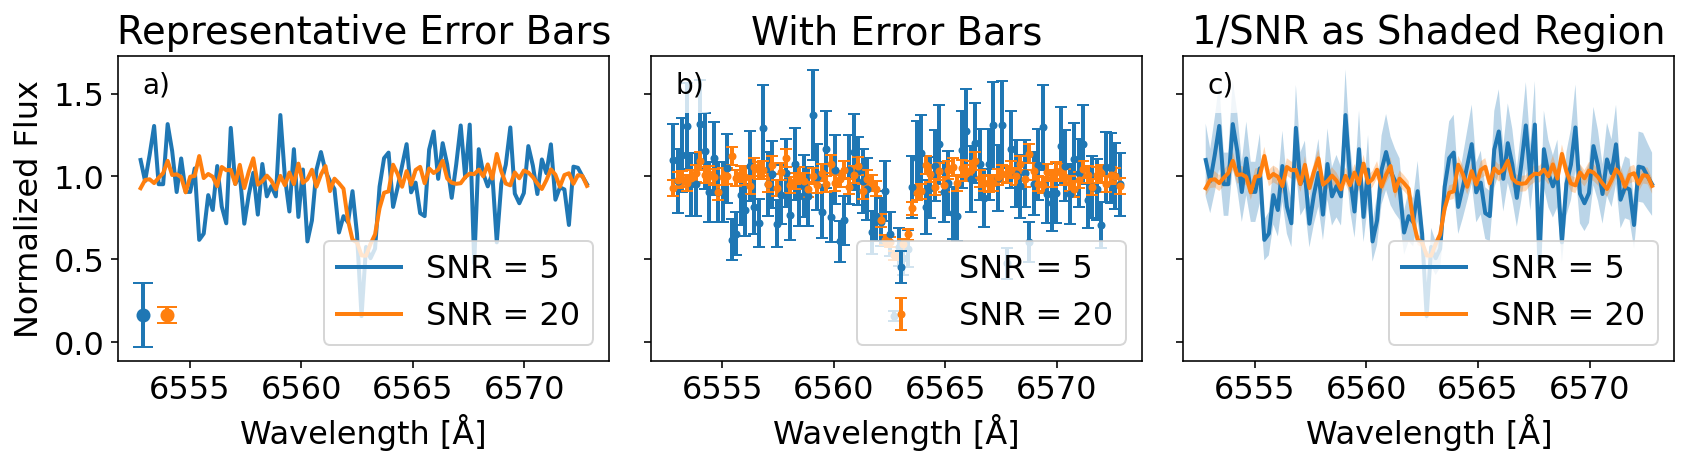

In [4]:
# 2 measurements with the same behaviour, but signal-to-noise ratio 10 and 25

# Seed for reproducibility
np.random.seed(42)

# Generate fake data
wavelength = np.linspace(6562.8-10, 6562.8+10, 100)  # Around H-alpha

# Create fake best-flux measurement that are very similar
flux_best_1 = 1 - 0.5 * np.exp(-0.5 * ((wavelength - 6562.8) / 0.5) ** 2)
flux_best_2 = 1 - 0.5 * np.exp(-0.45 * ((wavelength - 6562.8) / 0.5) ** 2)

# 2 casses of SNR:
snr_1 = 5
snr_2 = 20

noise_1 = 1 / snr_1 * np.random.randn(len(wavelength))
noise_2 = 1 / snr_2 * np.random.randn(len(wavelength))

flux_best_1 = flux_best_1 + noise_1
flux_best_2 = flux_best_2 + noise_2

flux_uncertainty_1 = flux_best_1 / snr_1 * np.ones_like(flux_best_1)
flux_uncertainty_2 = flux_best_2 / snr_2 * np.ones_like(flux_best_2)

# # let's also add some crazy systematic to our function
# flux_best_1 += 0.1 * (wavelength / 5 - np.floor(0.5 + wavelength / 5))
# flux_best_2 += 0.1 * np.sin(wavelength*2)
# # You can also imagine that would be noise that you have not accounted for (e.g. instrument systematics)

# Create figure and subplots
fig, axs = plt.subplots(1,3,figsize=(12,3.5),sharex=True,sharey=True)

# Panel (a): Representative error bars
ax = axs[0]
ax.text(0.05, 0.95, panels[0], transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox = panel_bbox)
ax.plot(wavelength, flux_best_1, label='SNR = '+str(snr_1))
ax.plot(wavelength, flux_best_2, label='SNR = '+str(snr_2))
ax.set_title('Representative Error Bars')
ax.set_xlabel('Wavelength [Å]')
ax.set_ylabel('Normalized Flux')
ax.legend(loc='lower right')

# Get the axis limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Convert relative position to data coordinates
x_abs = xlim[0] + 0.02 * (xlim[1] - xlim[0])
y_abs = ylim[0] + 0.02 * (ylim[1] - ylim[0])
ax.errorbar(
    xlim[0] + 0.05 * (xlim[1] - xlim[0]),
    ylim[0] + 0.05 * (ylim[1] - ylim[0]),
    yerr=np.median(flux_uncertainty_1), fmt='o', color='C0', capsize=5
)
ax.errorbar(
    xlim[0] + 0.10 * (xlim[1] - xlim[0]),
    ylim[0] + 0.05 * (ylim[1] - ylim[0]),
    yerr=np.median(flux_uncertainty_2), fmt='o', color='C1', capsize=5
)

# # Panel (b): With error bars
ax = axs[1]
ax.text(0.05, 0.95, panels[1], transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox = panel_bbox)
ax.errorbar(wavelength, flux_best_1, yerr=flux_uncertainty_1, label='SNR = '+str(snr_1), fmt='.', capsize=3)
ax.errorbar(wavelength, flux_best_2, yerr=flux_uncertainty_2, label='SNR = '+str(snr_2), fmt='.', capsize=3)
ax.set_title('With Error Bars')
ax.set_xlabel('Wavelength [Å]')
ax.legend()

# Panel (c): Errors as fill_between
ax = axs[2]
ax.text(0.05, 0.95, panels[2], transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox = panel_bbox)
ax.plot(wavelength, flux_best_1, label='SNR = '+str(snr_1))
ax.fill_between(wavelength, flux_best_1 - flux_uncertainty_1, flux_best_1 + flux_uncertainty_1, alpha=0.3)
ax.plot(wavelength, flux_best_2, label='SNR = '+str(snr_2))
ax.fill_between(wavelength, flux_best_2 - flux_uncertainty_2, flux_best_2 + flux_uncertainty_2, alpha=0.3)
ax.set_title('1/SNR as Shaded Region')
ax.set_xlabel('Wavelength [Å]')
ax.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()

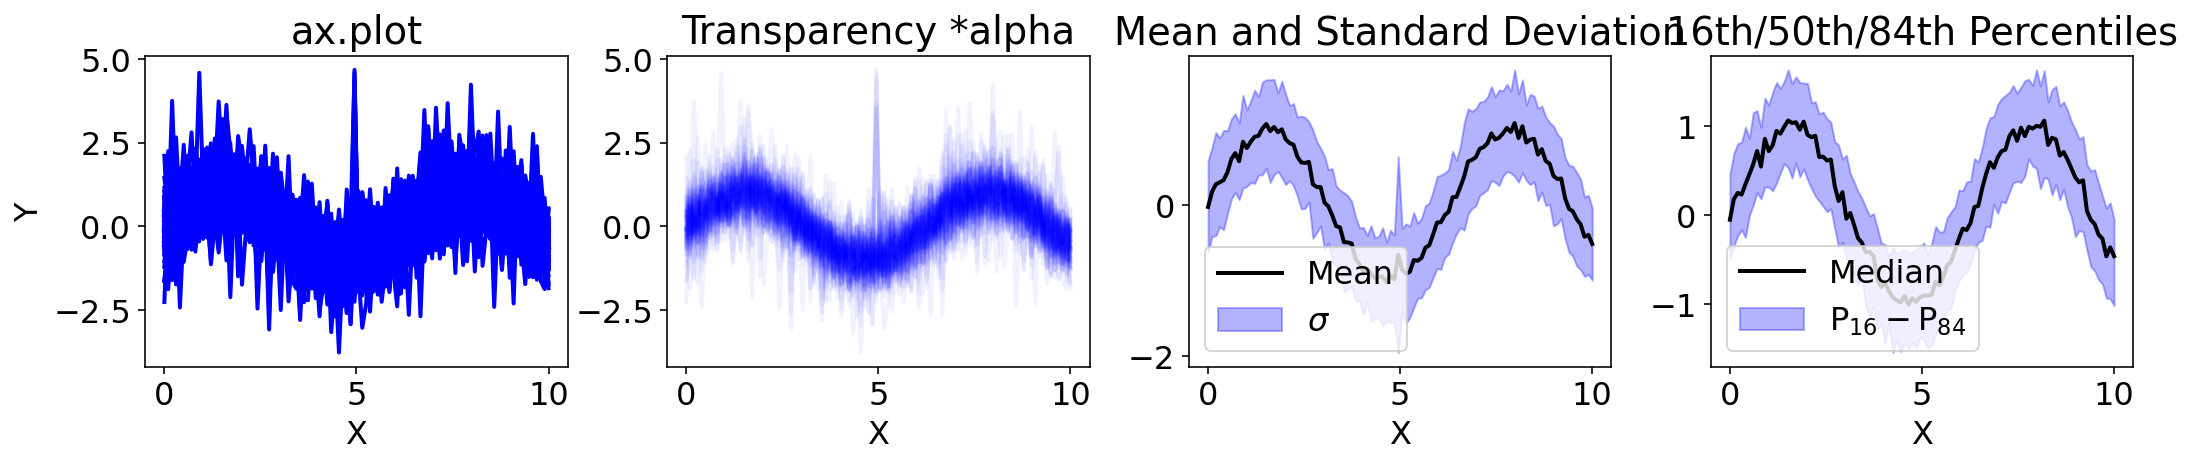

In [5]:
# Imagine you repeat a measurement 100. How should we plot those? 

# Generate x values
x = np.linspace(0, 10, 100)

# True underlying function (for example, a sine wave)
y_true = np.sin(x)

# Number of repeats
num_repeats = 100

# Uncertainty
uncertainty = 0.5

# Probability of having an outlier in any given data point
outlier_prob = 0.1
fixed_outlier_prob = 0.1

# Generate y values for each trial with added noise and occasional outliers
y_trials = []
for _ in range(num_repeats):
    y = y_true + np.random.normal(0, uncertainty, size=len(x))
    
    # Add random outliers
    outliers = np.random.choice([0, 1], size=len(x), p=[1 - outlier_prob, outlier_prob])
    y += outliers * np.random.normal(0, 1, size=len(x))  # Outliers around ~1
    
    # Add a fixed outlier of 5 at the 50th position for 10% of trials
    if np.random.rand() < fixed_outlier_prob:
        y[50-1] += 5  # 50th position

    y_trials.append(y)

# Create figure and subplots
fig, axs = plt.subplots(1,4,figsize=(15,3.5))

# Panel (a): Plot all 100 lines without transparency
ax = axs[0]
for y in y_trials:
    ax.plot(x, y, color='blue')
ax.set_title("ax.plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Panel (b): Plot all 100 lines with alpha=0.X
ax = axs[1]
for y in y_trials:
    ax.plot(x, y, color='blue', alpha=0.05)
ax.set_title("Transparency *alpha")
ax.set_xlabel("X")

# Panel (c): Plot the mean and standard deviation
ax = axs[2]
y_mean = np.mean(y_trials, axis=0)
y_std = np.std(y_trials, axis=0)

ax.plot(x, y_mean, color='black', label='Mean')
ax.fill_between(x, y_mean-y_std, y_mean+y_std, color='blue', alpha=0.3, label=r'$\sigma$')
ax.set_title("Mean and Standard Deviation")
ax.set_xlabel("X")
ax.legend(loc='lower left')

# Panel (d): Plot the median and 16th/84th percentiles
ax = axs[3]
y_median = np.median(y_trials, axis=0)
y_16th = np.percentile(y_trials, 16, axis=0)
y_84th = np.percentile(y_trials, 84, axis=0)

ax.plot(x, y_median, color='black', label='Median')
ax.fill_between(x, y_16th, y_84th, color='blue', alpha=0.3, label=r'$\mathrm{P}_{16} - \mathrm{P}_{84}$')
ax.set_title("16th/50th/84th Percentiles")
ax.set_xlabel("X")
ax.legend(loc='lower left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**What can we learn from the different projections about our experiment?**

## Patterns: matplotlib scatter/plot vs. hist2d/binned_statistic_2d

- **Overlapping Data Points:** `plt.scatter` or `plt.plot` can obscure important patterns when data points overlap, making it difficult to distinguish between different regions or clusters.
  
- **Loss of Information:** When points overlap, vital information can be hidden, particularly in areas with high data density or varying data distributions.

- **Enhanced Clarity with `plt.hist2d`:** Aggregating data into bins using `plt.hist2d` or `binned_statistic_2d` helps to visualize density, mean values, or variability across the data space.

- **Better Pattern Recognition:** Binned statistics methods make it easier to identify underlying patterns, trends, and variations that might be missed in scatter plots.


In [6]:
from scipy.stats import binned_statistic_2d

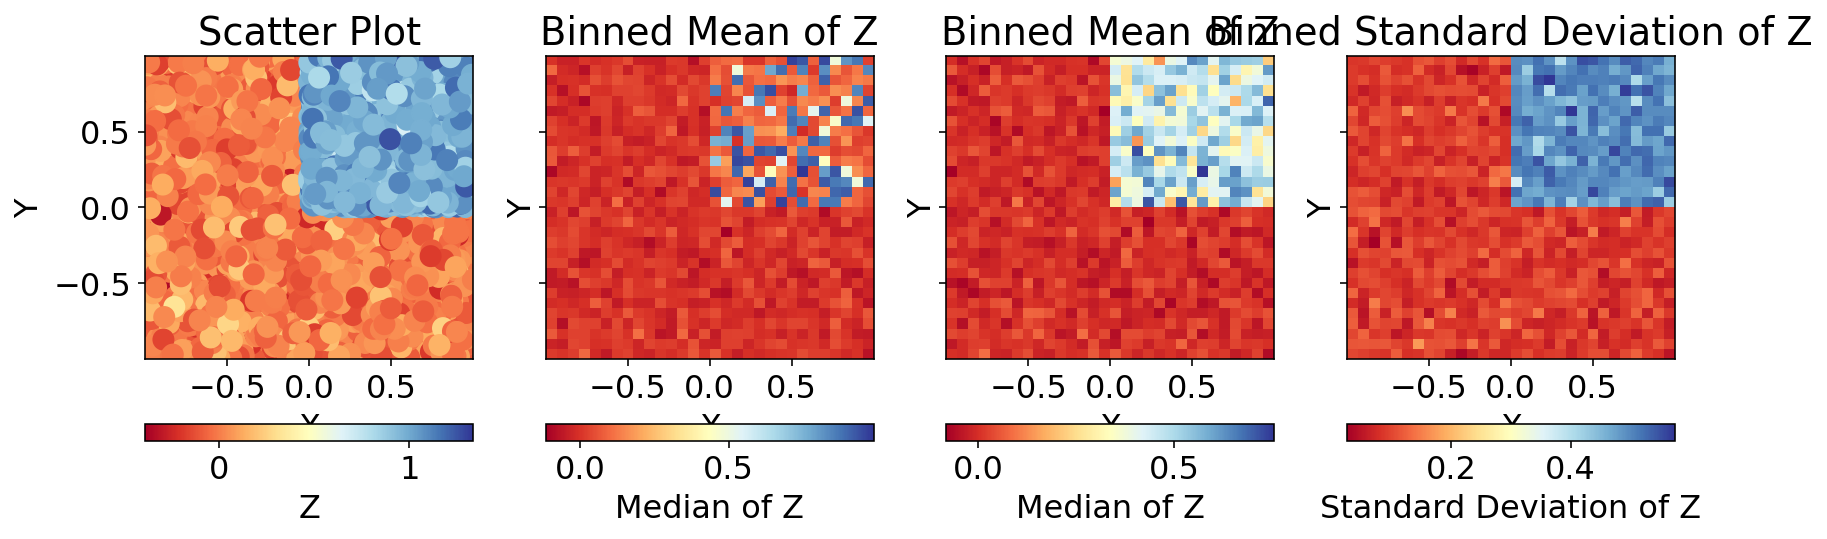

In [7]:
# 4-panel plot visualising the loss of information in a scatter plot and enhanced clarity with hist2d:

# Seed for reproducibility
np.random.seed(42)

# Generate Pattern 1
n_points_1 = 10000
x1 = np.random.uniform(-1, 1, n_points_1)
y1 = np.random.uniform(-1, 1, n_points_1)
z1 = 0.1 * np.random.randn(n_points_1)  # Z-values around 0

# Generate Pattern 2
n_points_2 = 2000
x2 = np.random.uniform(0, 1, n_points_2)
y2 = np.random.uniform(0, 1, n_points_2)
z2 = 1 + 0.1 * np.random.randn(n_points_2)  # Z-values around 1

# Combine the patterns
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
z = np.concatenate([z1, z2])

# Create figure and subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 4), sharex=True, sharey=True)

# First panel: Scatter plot
sc = axs[0].scatter(x, y, c=z, cmap='RdYlBu', s=100)
axs[0].set_title("Scatter Plot")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
plt.colorbar(sc, ax=axs[0], label="Z", orientation='horizontal')

# Second panel: 2D histogram (binned stats) colored by median
bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(x, y, z, statistic='median', bins=30)
im = axs[1].imshow(bin_stat_mean.T, origin='lower', aspect='auto',
                   extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                   cmap='RdYlBu')
axs[1].set_title("Binned Mean of Z")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")
plt.colorbar(im, ax=axs[1], label="Median of Z", orientation='horizontal')

# Third panel: 2D histogram (binned stats) colored by mean
bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(x, y, z, statistic='mean', bins=30)
im = axs[2].imshow(bin_stat_mean.T, origin='lower', aspect='auto',
                   extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                   cmap='RdYlBu')
axs[2].set_title("Binned Mean of Z")
axs[2].set_xlabel("X")
axs[2].set_ylabel("Y")
plt.colorbar(im, ax=axs[2], label="Median of Z", orientation='horizontal')

# Fourth panel: 2D histogram (binned stats) colored by standard deviation
bin_stat_std, xedges, yedges, binnumber = binned_statistic_2d(x, y, z, statistic='std', bins=30)
im2 = axs[3].imshow(bin_stat_std.T, origin='lower', aspect='auto',
                    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                    cmap='RdYlBu')
axs[3].set_title("Binned Standard Deviation of Z")
axs[3].set_xlabel("X")
axs[3].set_ylabel("Y")
plt.colorbar(im2, ax=axs[3], label="Standard Deviation of Z", orientation='horizontal')

# Show plot
plt.tight_layout()
plt.show()

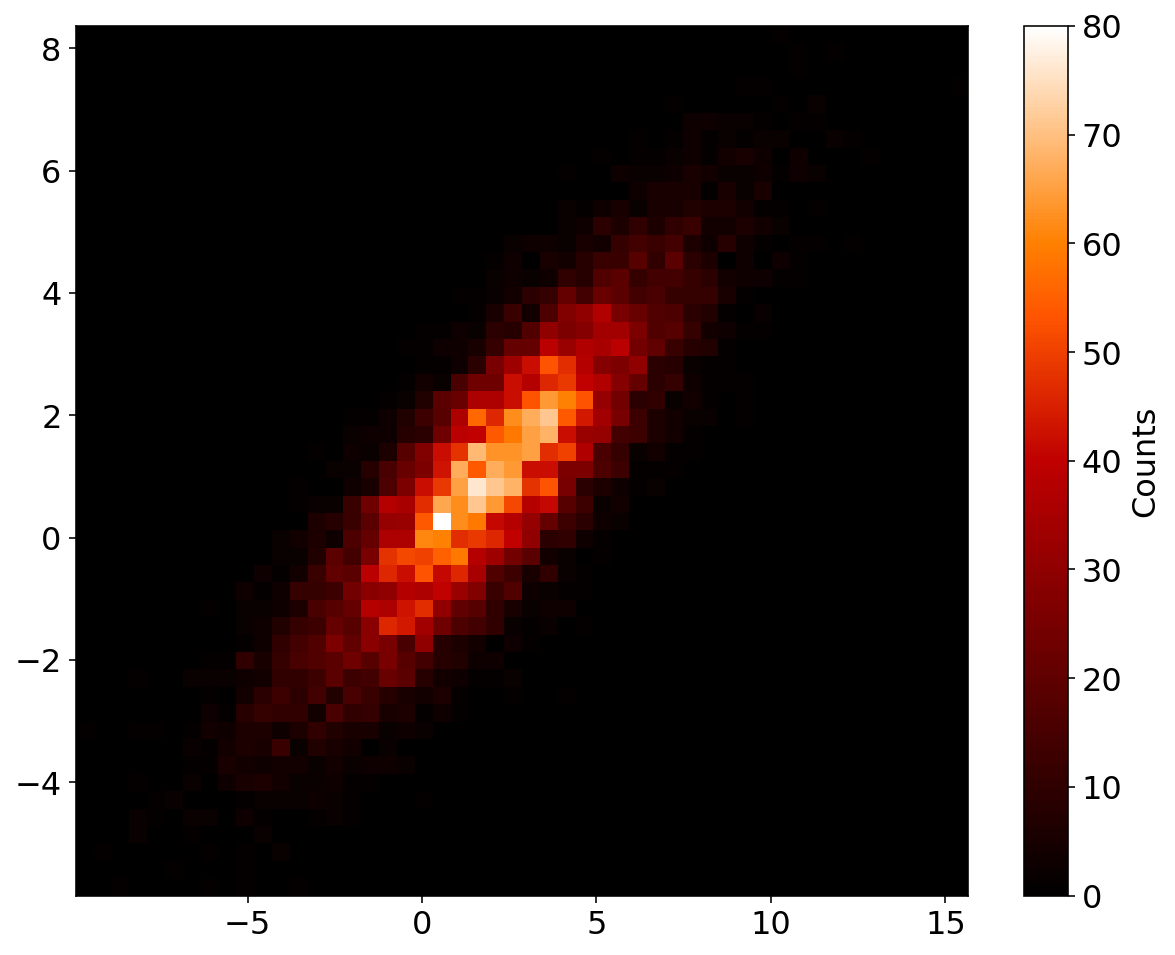

In [8]:
# hist2d for multivariate Gaussians

mean = [2, 1]
cov = [[9, 5],
       [5, 4]]
x, y = np.random.multivariate_normal(mean, cov, size=10000).T # draw a multivariate Gaussian

plt.hist2d(x, y, bins=50, cmap='gist_heat') # try different color maps: viridis(default), inferno, gist_heat

plt.colorbar(label='Counts'); 

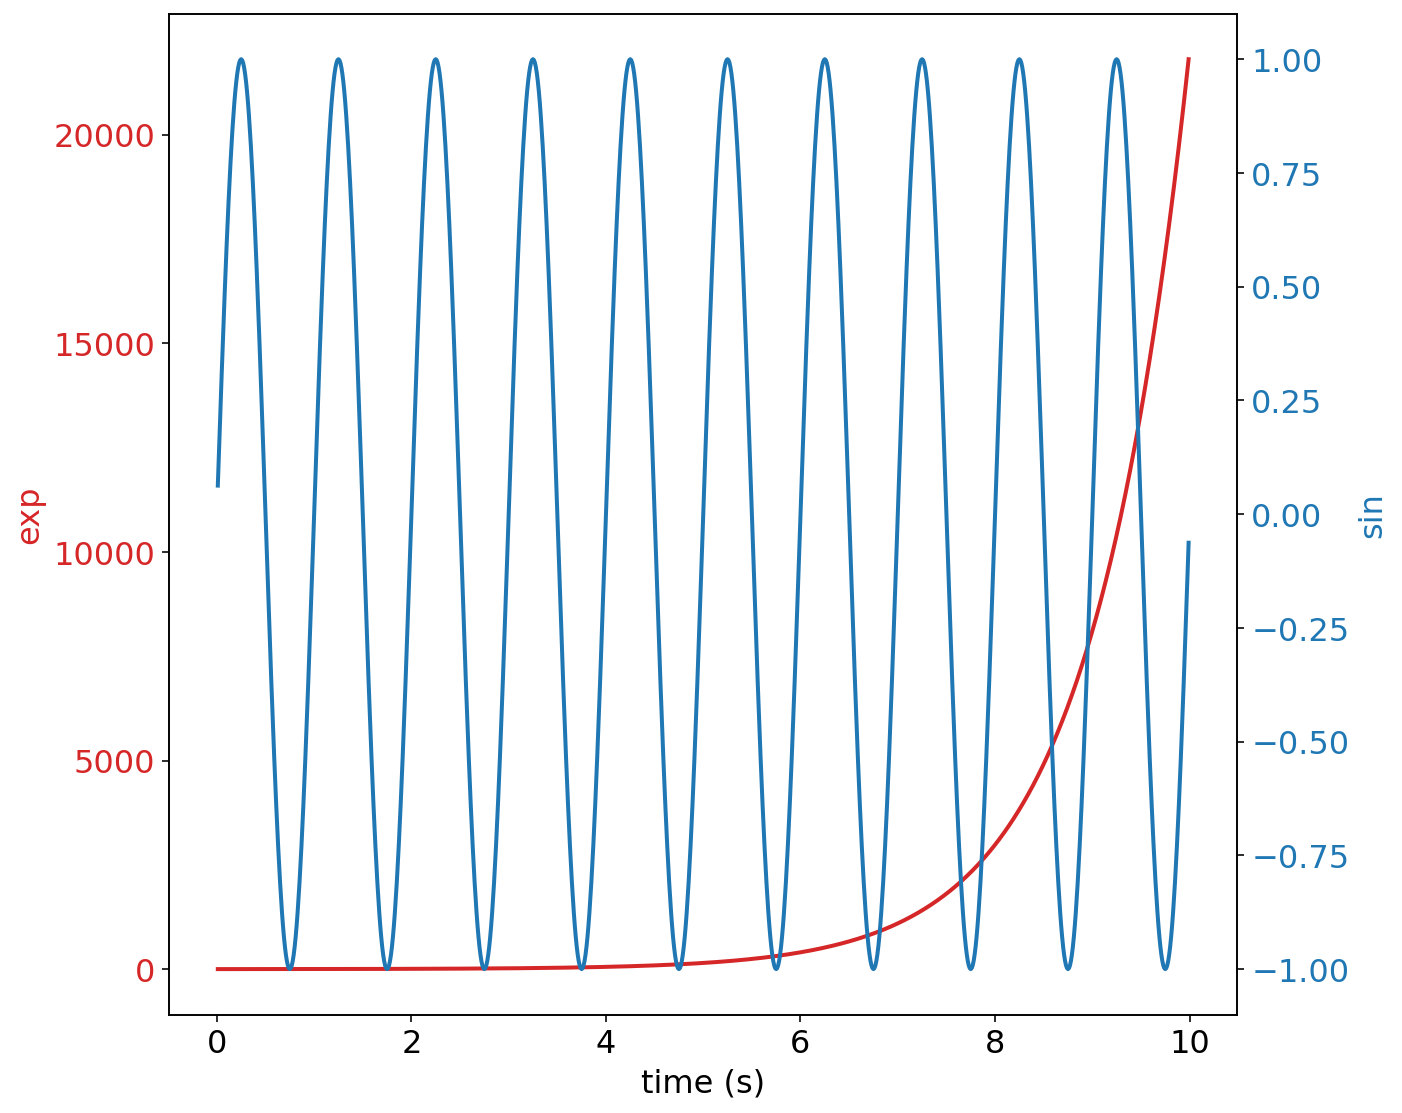

In [9]:
# 2 y-axes (by creating twinx)

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t) # make the data

fig, ax1 = plt.subplots() # instantiate the plot

color = 'tab:red' # make th first plot
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

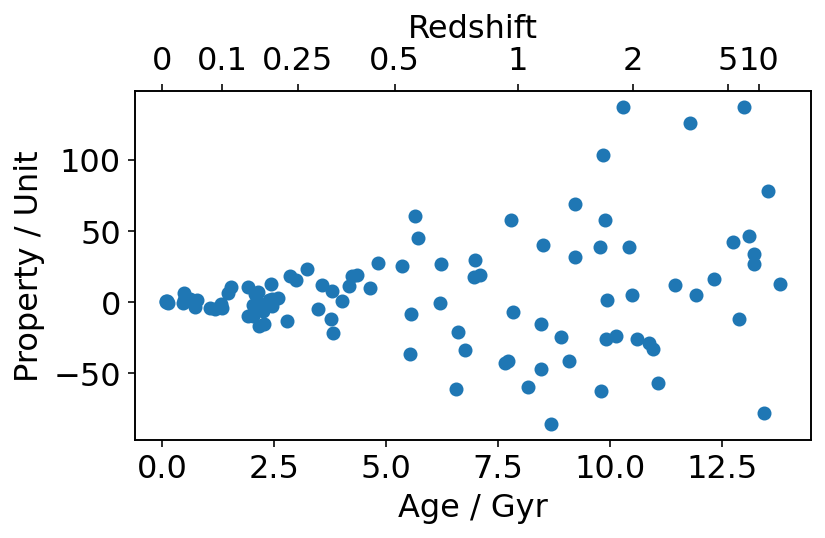

In [10]:
# Redshift and age

from astropy.cosmology import Planck15 as cosmo

f, ax = plt.subplots(1,1,figsize=(6,4))

np.random.seed(813)
ages = 13.8 * np.random.random_sample(100) # age in Gyr
random_variable_y = ages * np.random.normal(0,5,len(ages))

ax.scatter(ages, random_variable_y)
ax.set_xlabel('Age / Gyr')
ax.set_ylabel('Property / Unit')

# Create the secondary x-axis (redshift)
ax2 = ax.twiny()

# Set the redshift labels and ticks
redshift_ticks = [0,0.1,0.25,0.5,1,2,5,10]  # Select reasonable redshift ticks
age_ticks = [cosmo.age(0).value-cosmo.age(z).value for z in redshift_ticks]
ax2.set_xticks(age_ticks)
ax2.set_xticklabels(redshift_ticks)
ax2.set_xlim(ax.get_xlim())
ax2.set_xlabel('Redshift')

plt.tight_layout()

/var/folders/g_/1ch053ys79n87jsnqjz0yr_h0000gq/T/ipykernel_46031/2692231682.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.exp(-x)*x**k / np.math.factorial(k)
/var/folders/g_/1ch053ys79n87jsnqjz0yr_h0000gq/T/ipykernel_46031/2692231682.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.exp(-x)*x**k / np.math.factorial(k)


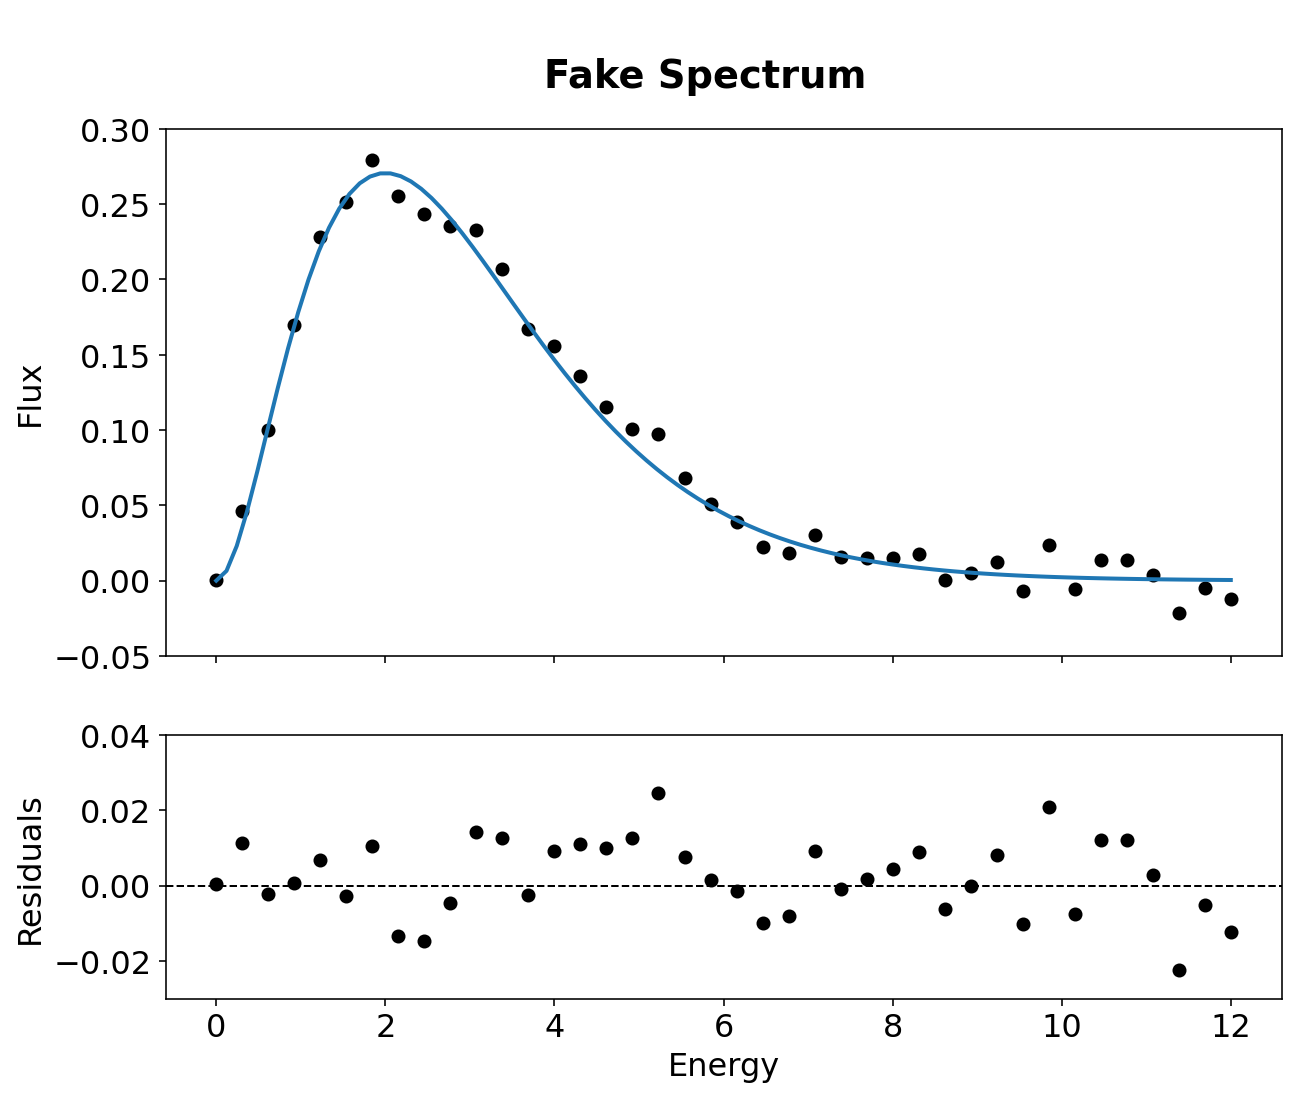

In [11]:
def poisson(x, k):
    return np.exp(-x)*x**k / np.math.factorial(k)

x = np.linspace(0, 12, 40)
y = poisson(x, 2)
y_noise = y + np.random.normal(0, 0.01, len(y))
z = np.linspace(0, 12, 100)

# define the height ratio for the different subplot
gridspec = {'height_ratios': [2, 1]}
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=gridspec)

ax1.plot(x, y_noise, 'ko')
ax1.plot(z, poisson(z, 2))
ax1.set_ylim(-0.05, 0.30)
ax1.set_ylabel('Flux')

ax2.plot(x, y_noise - y, 'ko')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1) # make a horizontal line
ax2.set_xlabel('Energy')
ax2.set_ylim(-0.03, 0.04)
ax2.set_ylabel('Residuals')

fig.suptitle('\nFake Spectrum', fontweight='bold');

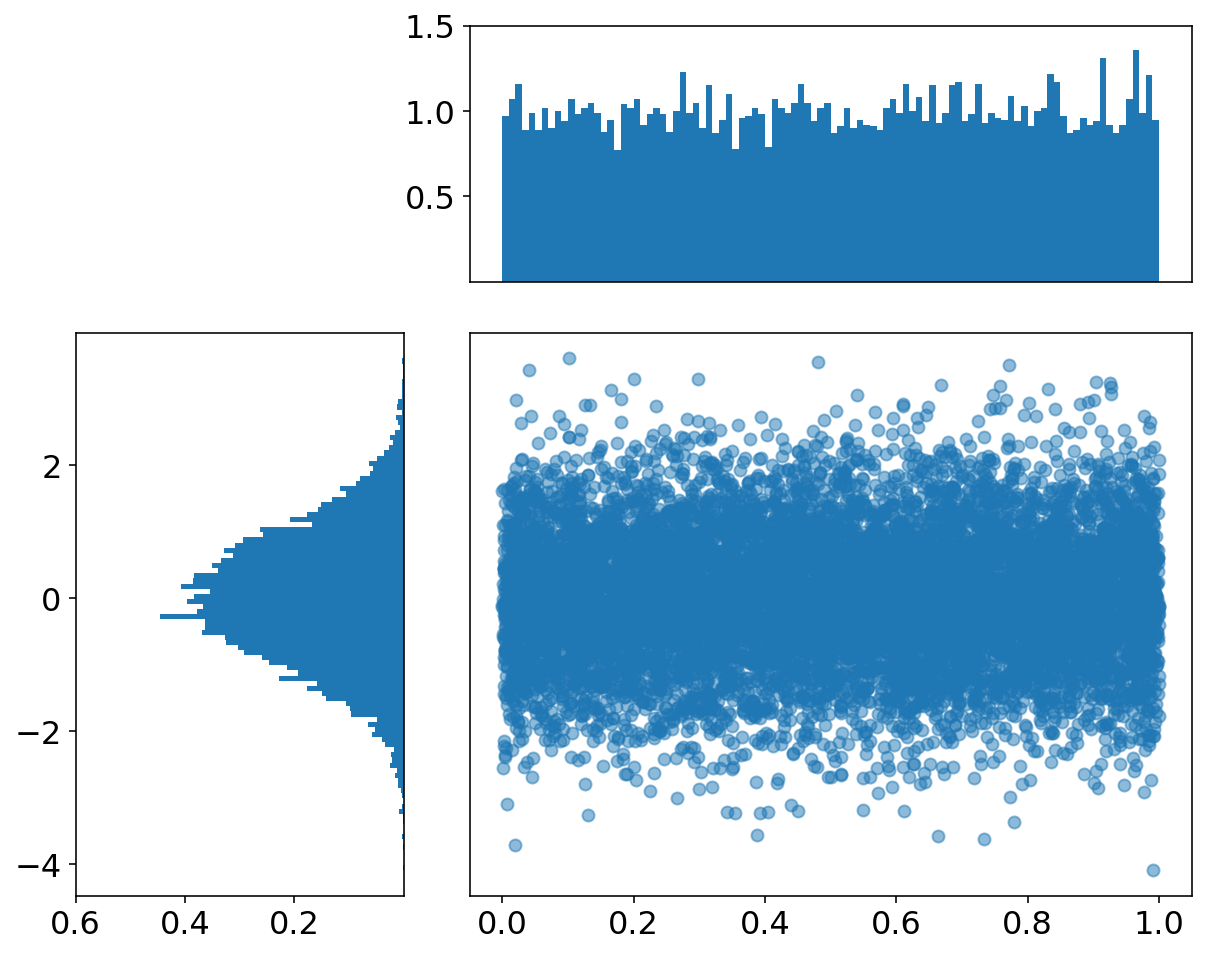

In [12]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

fig = plt.figure()
gspec = gridspec.GridSpec(3, 3) 

# define these subplots separately
top_histogram = fig.add_subplot(gspec[0, 1:])
side_histogram = fig.add_subplot(gspec[1:, 0])
lower_right = fig.add_subplot(gspec[1:, 1:])

# We produce two sets of random data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# plotting in different subplots
top_histogram.hist(X, bins=100, density=True)
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)

# flip the side histogram's x axis
side_histogram.invert_xaxis()
lower_right.scatter(X, Y, alpha=0.5)

# Remove the picks in-between
top_histogram.set_xticks([])
lower_right.set_yticks([])
top_histogram.set_yticks(top_histogram.get_yticks()[1:])
side_histogram.set_xticks(side_histogram.get_xticks()[1:]);

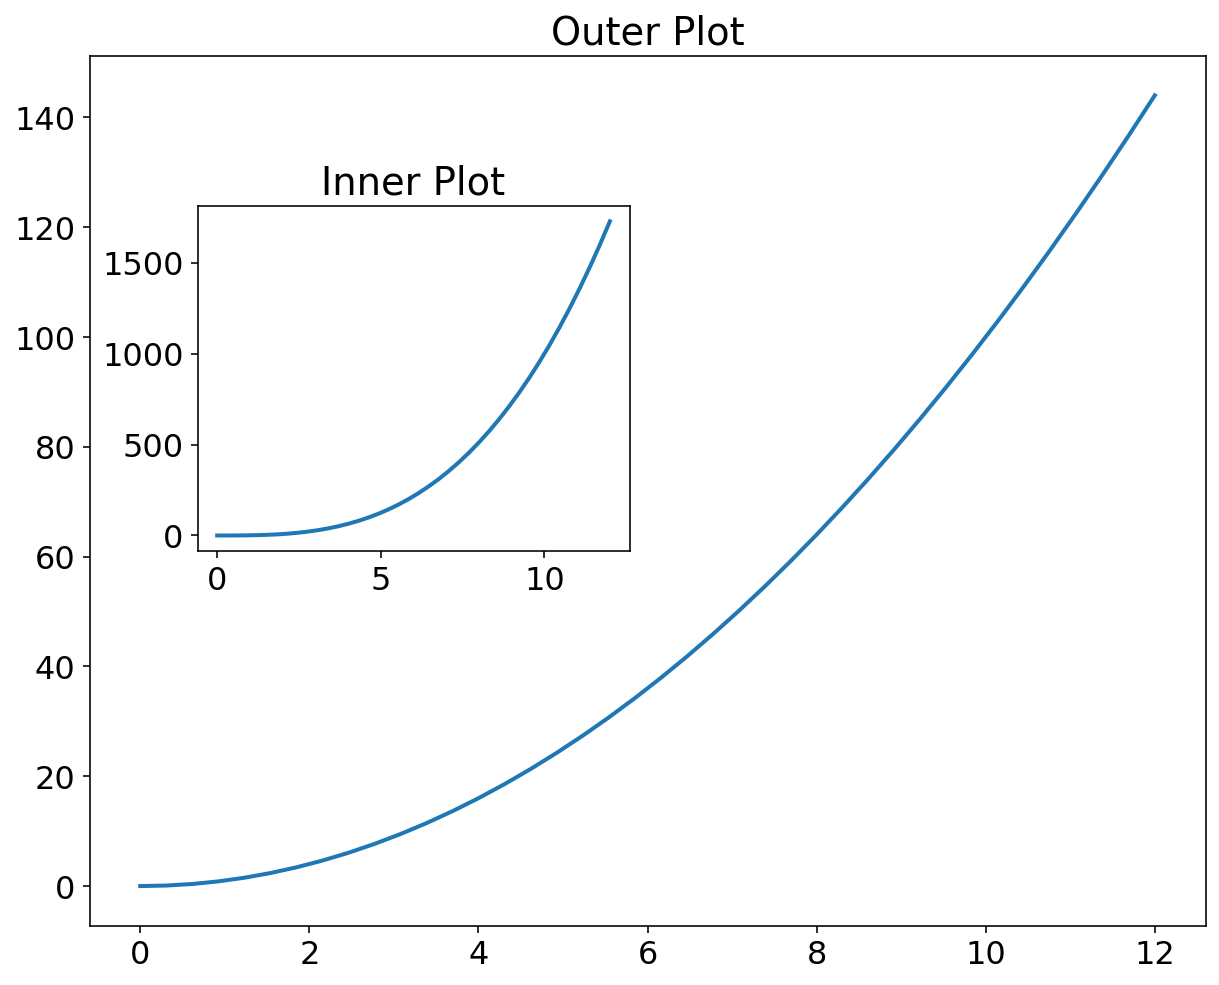

In [13]:
plt.plot(x, x**2)
plt.title("Outer Plot")

# axes coordinates: (0,0) is lower left, (1,1) upper right
plt.axes([0.2, 0.45, 0.3, 0.3])
plt.plot(x, x**3)
plt.title("Inner Plot");

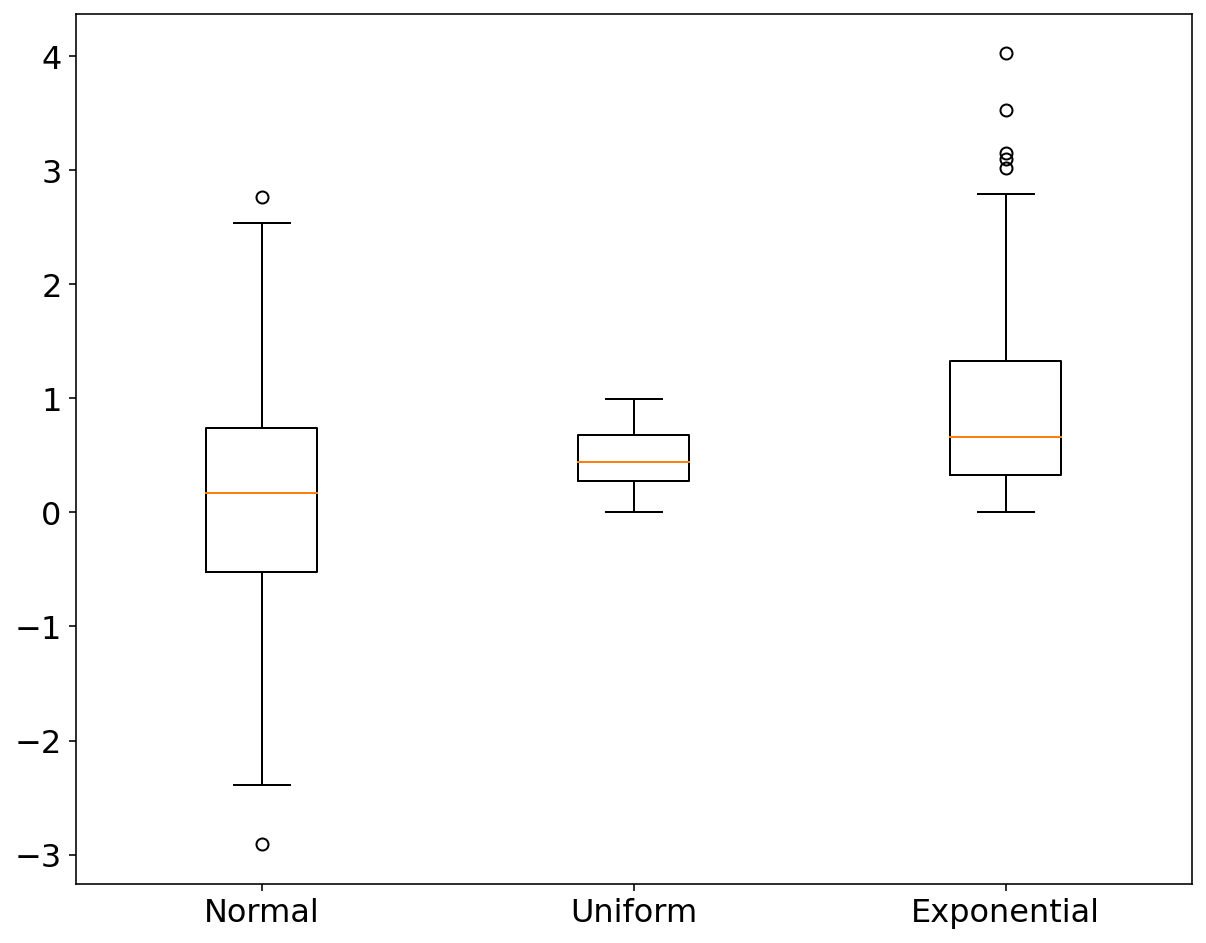

In [14]:
# Box plots

s1 = np.random.normal(size=100)
s2 = np.random.uniform(size=100)
s3 = np.random.exponential(size=100)
plt.boxplot([s1, s2, s3], labels=['Normal', 'Uniform', 'Exponential']);# 

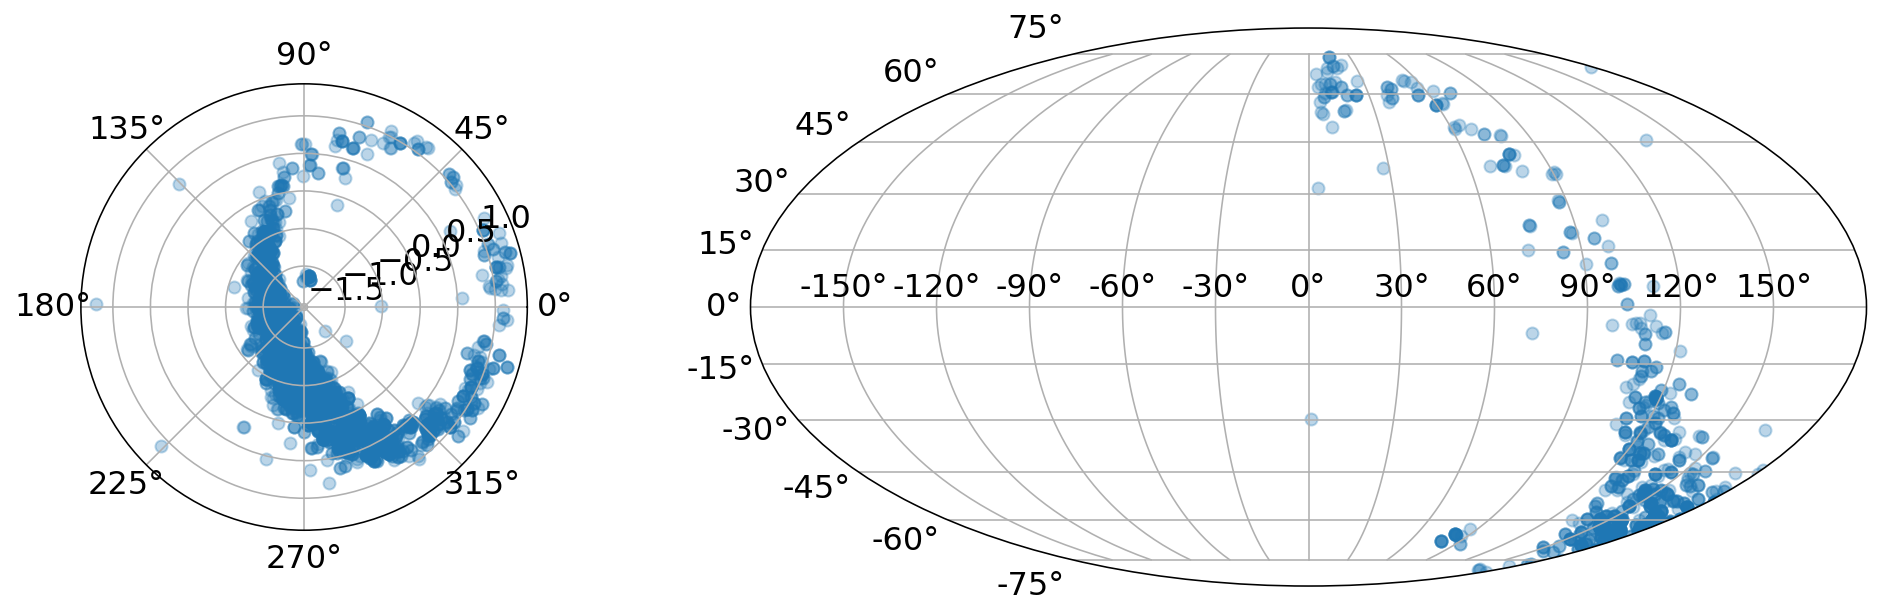

In [15]:
import matplotlib.gridspec as gridspec

# load the data
gaia_data = np.loadtxt("data/GaiaDR2.csv", delimiter=',', skiprows=1)

gs = gridspec.GridSpec(1, 3, wspace=0.5)

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(gs[0], projection='polar')
ax1.scatter(np.deg2rad(gaia_data[:, 0]), np.deg2rad(gaia_data[:, 1]), alpha=0.3)

ax2 = fig.add_subplot(gs[1:], projection='mollweide')
ax2.scatter(np.deg2rad(gaia_data[:, 0]), np.deg2rad(gaia_data[:, 1]), alpha=0.3)
ax2.grid()

## My favourite plot from my undergrad: Lagrange points or "Where is JWST?"

<img src="data/JWST_Lagrange.png" alt="Artist depiction of JWST in the Solar system. Credit: Matthew Twombly (graphic); Heidi B. Hammel/Shari Lifson/Association of Universities for Research in Astronomy (content consultants)" width="50%"/>

Figure: Artist depiction of JWST in the Solar system. Credit: Matthew Twombly (graphic); Heidi B. Hammel/Shari Lifson/Association of Universities for Research in Astronomy (content consultants)

### The restricted three-body problem


In celestial mechanics, the **restricted three-body problem** describes the motion of a small object (such as a spacecraft or an asteroid) under the gravitational influence of two much larger celestial bodies (such as the Sun and the Earth) which are assumed to be in circular orbits around their common center of mass.

By using a clever reference system, that is, a rotating reference frame, we can find a a **conserved quantity** combining the object's **kinetic energy**, **gravitational potential energy**, and **rotational energy**, the so called Jacobi constant. It can help us to find regions of space where the object's velocity is zero, meaning that it would be held stationary by the balance of gravitational and centrifugal forces.


### Lagrange Points

Because it is not the main focus of this tutorial, we will skip the derivation of the formulas to calculate the individual Lagrange points, where gravity is providing the centripetal force.

The $ L_2 $ point lies along the line connecting the two massive bodies (the Sun and the Earth with distance $R$) and is located **beyond the Earth** at a distance $R+r$. The gravitational forces exerted by the Sun (with mass $M_1$) and the Earth ($M_2$) on the small third body ($m_3$) must be balanced by the centrifugal force (with respect to the barycenter $\frac{M_1}{M_1 + M_2} R$), which arises because we are analyzing the system in a rotating reference frame.

$$
F_{\text{Sun}} + F_{\text{Earth}} = F_{\text{centrifugal}}
$$

$$
F_{\text{Sun}} = \frac{G M_1 m_3}{(R + r)^2} \qquad F_{\text{Earth}} = \frac{G M_2 m_3}{r^2} \qquad F_{\text{centrifugal}} = m_3 \cdot (\frac{M_1}{M_1 + M_2} R + r) \cdot \omega^2
$$

We know the angular velocity musst be the same for both Earth and $m_3$, that is, $\omega = \frac{2\pi}{T}$. We can also calculate the period via Kepler's law for the Earth's movement:

$$
T^2 = \frac{4\pi^2 R^3}{G(M_1 + M_2)} \qquad \rightarrow \qquad \omega^2 = \frac{G(M_1 + M_2)}{R^3}
$$


Substituting the expressions for each force:

$$
\frac{G M_1 m_3}{(R + r)^2} + \frac{G M_2 m_3}{r^2} = m_3 \cdot (\frac{M_1}{M_1 + M_2} R + r) \cdot \frac{G(M_1 + M_2)}{R^3}
$$

Dividing by $G m_3$ leads to 

$$
\frac{M_1}{(R + r)^2} + \frac{M_2}{r^2} = \left( \frac{M_1}{M_1 + M_2} R + r \right) \frac{M_1 + M_2}{R^3}
$$

Solving this is a bit more complicated, but we can use a simple trick by rearranging the equation and substituting some ratios with:

$$ x = \frac{r}{R} \qquad \mu = \frac{M2}{M1+M2}$$

to arrive at a 5th order *quintic* function:
$$ x^5 + (\mu - 3) \cdot x^4 + (3 - 2 \mu) \cdot x^3 - \mu \cdot x^2 + 2 \mu \cdot x - mu = 0$$

Finding these tricks actually more complicated, but applying them is 'simple', because someone else has done it! These days, programes like ChatGPT can even guide you through the process of applying the trick to show you actually end up with the quintic function.

Solving this function is again more difficult, but can convince ourselves that the result must some sort of a root - and on top of that a real (and not imaginary) one. *scipy.optimize.fsolve* is a code that is written for solving exactly such functions, so we will save time here by simply solving the problem numerically.

### The Jacobi Constant $C$

For a given value of $ C $ in the restricted three-body problem, an object can only move in regions where its kinetic energy is positive. Regions where its kinetic energy would have to be negative (which isn't physically possible) are inaccessible to the object.

Staying in our reference frame, we can calculate the jacobi constant - or effective potential - with a st of functions and our mass radio $\mu$:

   - $ d_s(x, y, \mu) $: The distance between the small object and the first body (e.g., the Sun).
   - $ d_e(x, y, \mu) $: The distance between the small object and the second body (e.g., the Earth).

Mathematically, these distances are calculated as:

$$d_s(x, y, \mu) = \sqrt{(x + \mu)^2 + y^2}$$
$$d_e(x, y, \mu) = \sqrt{(1 - (x + \mu))^2 + y^2}$$

For example, if we are studying the Sun-Earth system, $ \mu $ is a very small number, as the mass of the Earth is tiny compared to the mass of the Sun.

Finally, we can find an effective potential, $C$, that takes into account the distances $ d_s $ and $ d_e $ to compute the potential energy of the object due to the gravitational pull of both large bodies. It is defined as:
   $$
   C(x, y, \mu) = x^2 + y^2 + 2 \left( \frac{1 - \mu}{(d_s(x, y, \mu))} + \frac{\mu}{(d_e(x, y, \mu))} \right)
   $$



Calculating Lagrange points and Jabobi constants for mu = 0.330000 and R_norm 1.0 AU


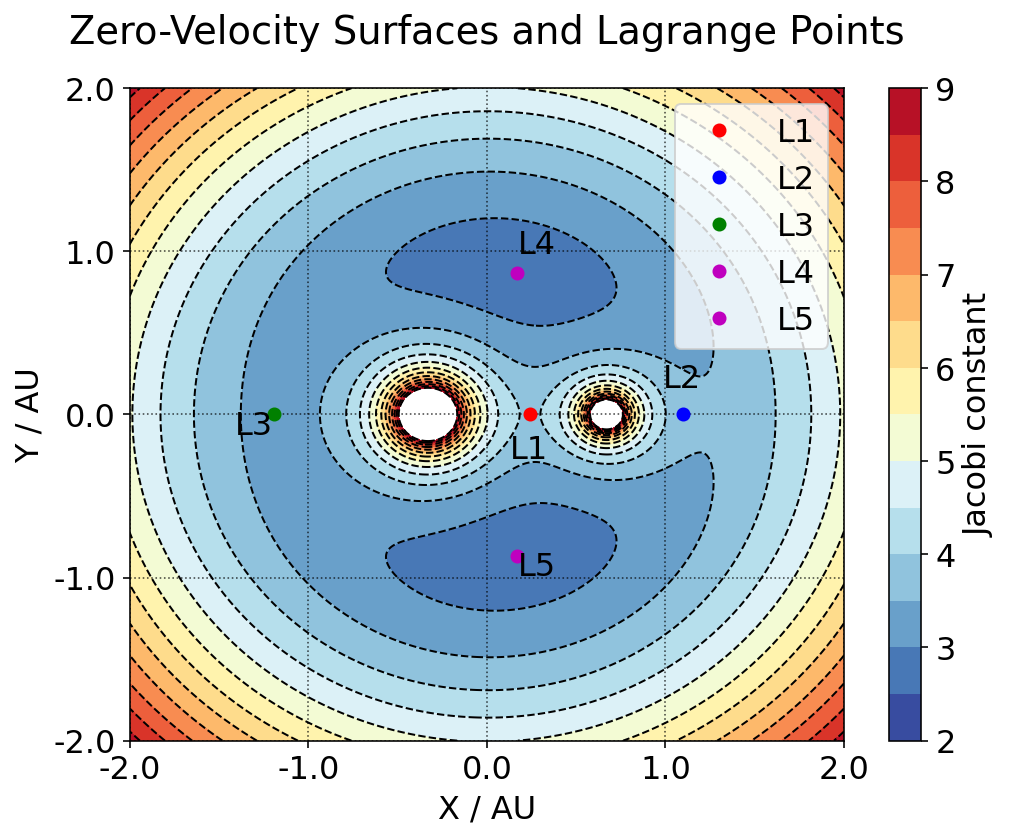

L1 (from M_2):  -0.43 AU  or  -63989002.0 km
L2 (from M_2):  0.43 AU  or  63989002.0 km


Calculating Lagrange points and Jabobi constants for mu = 0.000003 and R_norm 1.0 AU


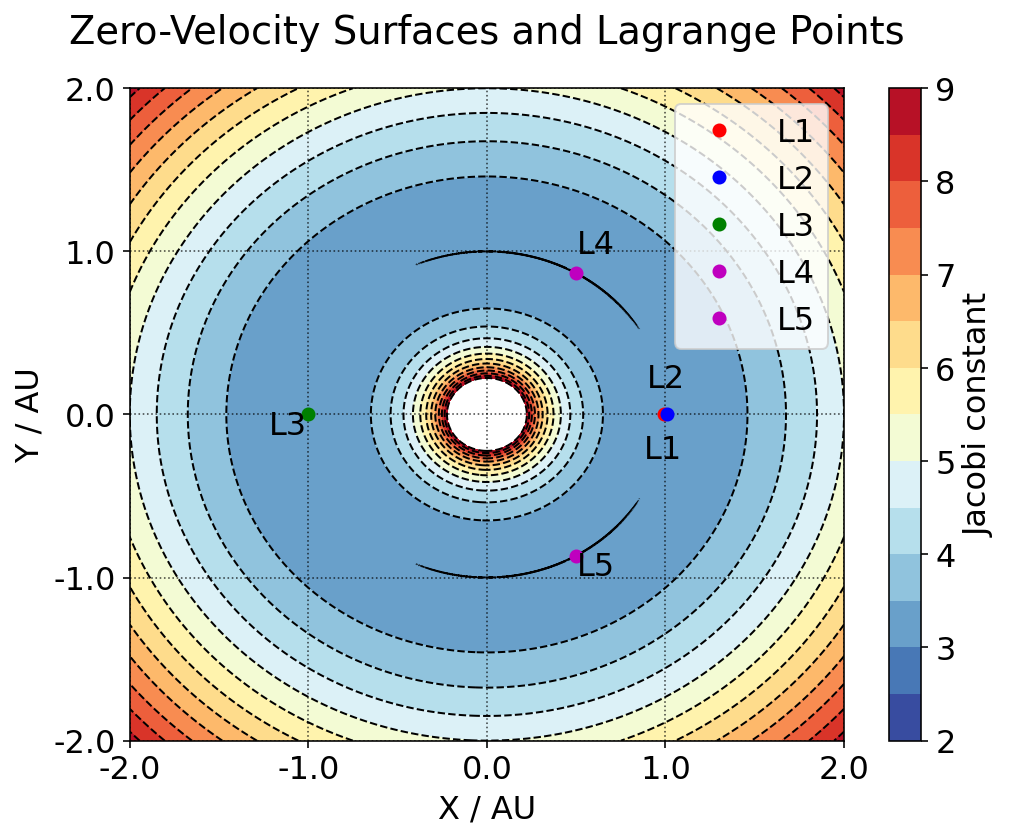

L1 (from M_2):  -0.01 AU  or  -1497456.0 km
L2 (from M_2):  0.01 AU  or  1497456.0 km


Calculating Lagrange points and Jabobi constants for mu = 0.000953 and R_norm 5.2 AU


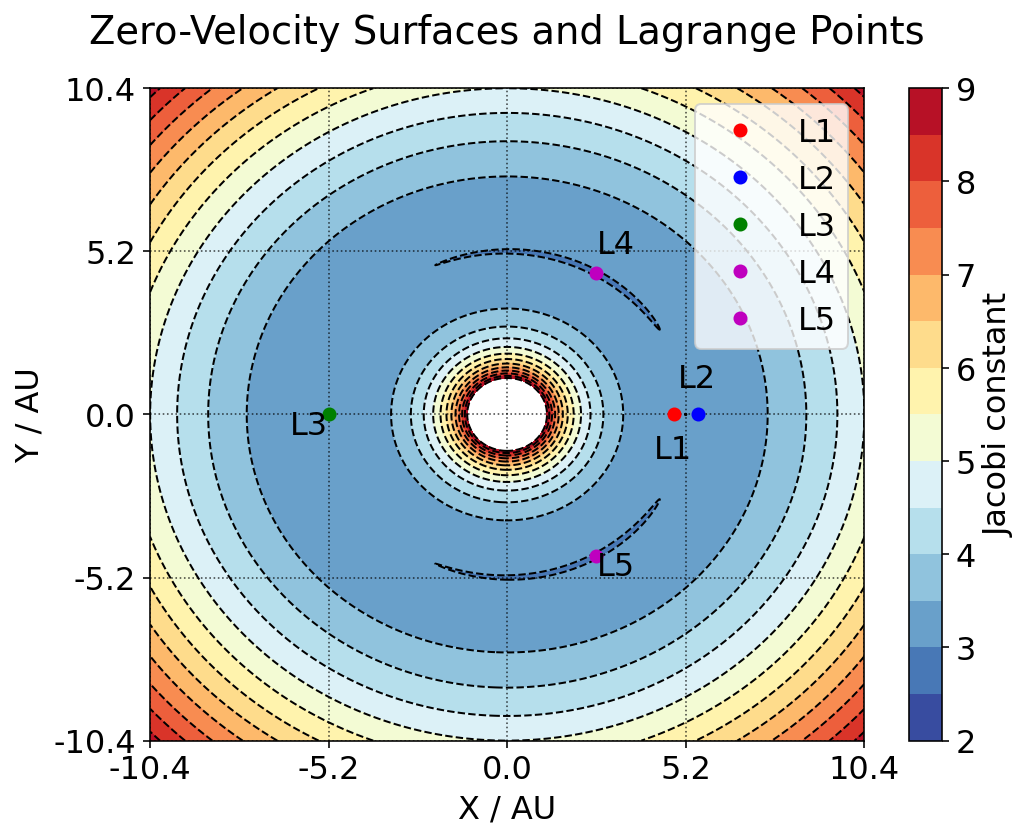

L1 (from M_2):  -0.35 AU  or  -51862992.0 km
L2 (from M_2):  0.35 AU  or  51862992.0 km


In [208]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from astropy.constants import M_sun, M_earth, M_jup, au

# Constants for Sun and Earth
M_sun = 1.989e30 * u.kg  # Mass of the Sun in kg
M_earth = (5.972e24 * u.kg + 7.342e22 * u.kg)  # Mass of the Earth in kg

mu_earth = (M_earth / (M_sun + M_earth)).value  # Mass ratio of Earth to the combined mass of Sun and Earth
mu_jup = (M_jup / (M_sun + M_jup)).value  # Mass ratio of Earth to the combined mass of Sun and Earth

# Function to calculate L1 - L5
def lagrange_points(mu):
    
    # Define the quintic equation for the L1 and L2 points
    def quintic_eq(x, mu):
        return x**5 + (mu - 3) * x**4 + (3 - 2 * mu) * x**3 - mu * x**2 + 2 * mu * x - mu

    # Solve for L1 and L2 using numerical methods (fsolve)
    def solve_L_points(mu):
        # Initial guesses for L1 and L2 (close to 1 for L1, slightly greater than 1 for L2)
        L1_guess = - (mu/3)**(1./3.) # this is a good approximation for a small 2nd Mass
        L2_guess = (mu/3)**(1./3.) # this is a good approximation for a small 2nd Mass

        # Solve the quintic equation for L1 and L2
        L1_solution = fsolve(quintic_eq, L1_guess, args=(mu))[0]
        L2_solution = fsolve(quintic_eq, L2_guess, args=(mu))[0]

        return (1 - mu) - L1_solution, (1 - mu) + L2_solution

    # Calculate L1 and L2
    L1, L2 = solve_L_points(mu)
        
    # L3 is on the opposite side of the Sun
    L3 = -7/12 * mu - 1
    
    # L4 and L5 form equilateral triangles with Sun and Earth
    L4_x = 0.5 - mu
    L4_y = np.sqrt(3) / 2
    
    L5_x = 0.5 - mu
    L5_y = -np.sqrt(3) / 2
    
    return L1, L2, L3, (L4_x, L4_y), (L5_x, L5_y)

# Define the distance to the Sun (primary body)
def distance_to_sun(x, y, mu):
    return np.sqrt((x + mu)**2 + y**2)

# Define the distance to the Earth (secondary body)
def distance_to_earth(x, y, mu):
    return np.sqrt((1 - (x + mu))**2 + y**2)

# Effective potential function
def effective_potential(x, y, mu):
    return x**2 + y**2 + 2 * ((1 - mu) / distance_to_sun(x, y, mu) + mu / distance_to_earth(x, y, mu))

# X-Y cuts of the ZVSs (z=0) and plot Lagrange points
def plot_xy_cut_with_lagrange(mu, R_norm = 1*u.AU, levels=np.linspace(2, 9, 15)):
    
    print(f'\n\nCalculating Lagrange points and Jabobi constants for mu = {mu:4f} and R_norm {R_norm}')

    # Calculate the Lagrange points
    L1, L2, L3, L4, L5 = lagrange_points(mu)
        
    # Set up grid and calculate effective potential
    x = np.linspace(-2, 2, 2000)
    y = np.linspace(-2, 2, 2000)
    X, Y = np.meshgrid(x, y)
    Z = effective_potential(X, Y, mu)  # Using z=0 for X-Y plane

    # Plot filled contour with the colormap
    plt.figure(figsize=(8, 6))
    contour_filled = plt.contourf(X, Y, Z, levels=levels, cmap='RdYlBu_r')

    # Add contour lines with dashed style
    contour_lines = plt.contour(X, Y, Z, levels=levels, linewidths=1, colors='black', linestyles='dashed')

    # Add a colorbar to indicate Jacobi constant levels
    colorbar = plt.colorbar(contour_filled, label="Jacobi constant")

    # Plot the Lagrange points
    plt.plot(L1, 0, 'ro', label='L1')
    plt.plot(L2, 0, 'bo', label='L2')
    plt.plot(L3, 0, 'go', label='L3')
    plt.plot(L4[0], L4[1], 'mo', label='L4')
    plt.plot(L5[0], L5[1], 'mo', label='L5')

    # Annotate the Lagrange points
    plt.annotate('L1', (L1, 0), textcoords="offset points", xytext=(-10,-10), va='top')
    plt.annotate('L2', (L2, 0), textcoords="offset points", xytext=(-10,10), va='bottom')
    plt.annotate('L3', (L3, 0), textcoords="offset points", xytext=(-10,-10), ha='center')
    plt.annotate('L4', (L4[0], L4[1]), textcoords="offset points", xytext=(10,10), ha='center')
    plt.annotate('L5', (L5[0], L5[1]), textcoords="offset points", xytext=(10,-10), ha='center')

    # Plot title and labels
    plt.title('Zero-Velocity Surfaces and Lagrange Points',y=1.05)
    plt.xlabel('X / AU')
    plt.ylabel('Y / AU')
    
    # Adjust the frame and grid
    plt.grid(True, linestyle=':', color='black', alpha=0.7)
    
    # Adjust axis labels for given R_norm
    plt.xticks(np.linspace(-2,2,5),np.linspace(-2,2,5)*R_norm.value)
    plt.yticks(np.linspace(-2,2,5),np.linspace(-2,2,5)*R_norm.value)
    
    # Add legend for the Lagrange points
    plt.legend(loc='upper right')
    plt.show()

    print('L1 (from M_2): ',np.round(((L1 - (1 - mu))*R_norm).to(u.AU),2),' or ',np.round((L1 - (1 - mu))*R_norm.to(u.km)))
    print('L2 (from M_2): ',np.round(((L2 - (1 - mu))*R_norm).to(u.AU),2),' or ',np.round((L2 - (1 - mu))*R_norm.to(u.km)))

# Let's look at specific cases

# 1: Let's put the Sun and Earth at 1AU distance, but make the Earth half as heavy as the Sun (for visualisation)
plot_xy_cut_with_lagrange(mu = 0.33, R_norm = 1*u.AU, levels=np.linspace(2, 9, 15))

# 2: Not let's make the Earth as heavy (light?) as it actually is:
plot_xy_cut_with_lagrange(mu = mu_earth, R_norm = 1*u.AU)

# 3: Finally, let's look at the actually 2nd heaviest object in the solar System: Jupiter
plot_xy_cut_with_lagrange(mu = mu_jup, R_norm = 5.2*u.AU)  # Adjusting contour levels

**Fun fact:**  
Did you know that there are actually asteroids in the L4 and L5 points of the Sun-Jupiter frame?  
They are usually referred to as Trojan asteroids.

## More references

https://datascience.quantecon.org/tools/visualization_rules.html